In [ ]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import IPython.display as ipd
import os,shutil
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
from moviepy.editor import VideoFileClip, concatenate_videoclips

In [ ]:
#Load the audio file of the sports clip.
filename='powerplay.wav' #Enter your audio file name of match here. .wav,.mp3, etc. are supported.
vid, sample_rate = librosa.load(filename,sr=16000)
print(int(librosa.get_duration(y = vid, sr = sample_rate)/60))


31


In [ ]:
#Breaking down video into chunks of 5 seconds so that rise in energy can be found.
chunk_size=5
window_length = chunk_size * sample_rate


296.7486254040921


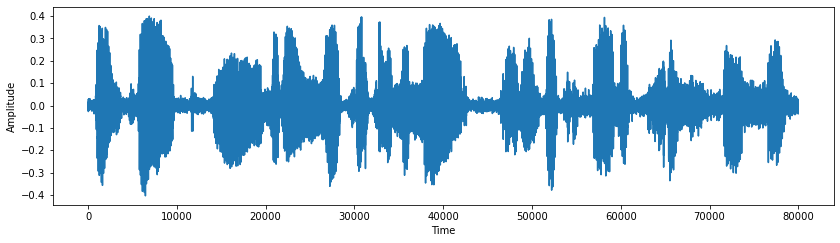

In [ ]:
#seeing an audio sample and it's time-amplitude graph
a=vid[5*window_length:6*window_length]
ipd.Audio(a, rate=sample_rate)
energy = sum(abs(a**2))
print(energy)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')
ax1.plot(a)

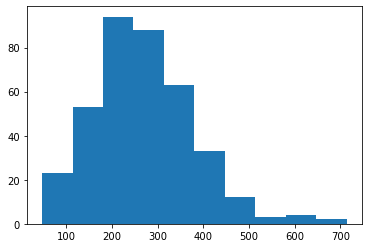

In [ ]:
#Plotting short time energy distribution histogram of all chunks
energy = np.array([sum(abs(vid[i:i+window_length]**2)) for i in range(0, len(vid), window_length)])
plt.hist(energy)
plt.show()
#Close graphs for progress of program

In [ ]:
#Finding and setting threshold value of commentator and audience noise above which we want to include portion in highlights.
df=pd.DataFrame(columns=['energy','start','end'])
thresh=300
row_index=0
for i in range(len(energy)):
	value=energy[i]
	if(value>=thresh):
		i=np.where(energy == value)[0]
		df.loc[row_index,'energy']=value
		df.loc[row_index,'start']=i[0] * 5
		df.loc[row_index,'end']=(i[0]+1) * 5
		row_index= row_index + 1


In [ ]:
#Merge consecutive time intervals of audio clips into one.
temp=[]
i,j,n=0,0,len(df) - 1
while(i<n):
	j=i+1
	while(j<=n):
		if(df['end'][i] == df['start'][j]):
			df.loc[i,'end'] = df.loc[j,'end']
			temp.append(j)
			j=j+1
		else:
			i=j
			break
df.drop(temp,axis=0,inplace=True)

In [ ]:
#Extracting subclips from the video file on the basis of energy profile obtained from audio file.
start=np.array(df['start'])
end=np.array(df['end'])

In [ ]:
#Create temporary folder for storing subclips generated. This folder will be deleted later after highlights are generated.
cwd=os.getcwd()
sub_folder=os.path.join(cwd,"Subclips")
if os.path.exists(sub_folder):
	shutil.rmtree(sub_folder)
	path=os.mkdir(sub_folder)
else:
	path=os.mkdir(sub_folder)
#print(sub_folder,type(sub_folder))

In [ ]:
#Extract moments from videos to be added in highlight
print(df)
for i in range(len(df)):
	if(i!=0):
		start_lim = start[i] - 5  #Assuming that noise starts after the shot, so set start point as t-5 seconds to include the shot/wicket action.
	else:
		start_lim = start[i]
	end_lim   = end[i]
	filename="highlight" + str(i+1) + ".mp4"
	ffmpeg_extract_subclip("videoplayback1.mp4",start_lim,end_lim,targetname=sub_folder+"/"+filename) #Enter your sports video clip name here.


         energy start   end
0    317.692535     5    10
1    398.352511    55    70
4    422.363762   100   105
5    415.729795   125   145
9    305.679425   220   225
10   484.630302   250   275
15   446.700669   295   305
17   328.809396   315   320
18   313.171356   365   375
20    356.19395   380   395
23   312.767893   405   410
24   437.197233   435   440
25   325.577143   460   475
28    382.04604   520   530
30   668.806219   545   570
35   340.644504   575   585
37   629.081872   610   640
43   357.348846   645   670
48    353.55574   675   680
49   357.759377   685   700
52   347.116752   715   720
53   335.202011   740   775
60   352.001862   785   790
61   345.102687   795   810
64   367.899659   830   835
65   383.390017   900   930
71    335.30329   935   945
73   356.648556   950   955
74   310.364267   970   975
75   345.115989   985  1000
78    381.58217  1040  1055
81   318.986318  1130  1160
87   520.410806  1170  1190
91   301.096641  1215  1225
93   372.394911  126

In [ ]:
files=os.listdir(sub_folder)
files=[sub_folder+"/highlight" + str(i+1) + ".mp4" for i in range(len(df))]
final_clip=concatenate_videoclips([VideoFileClip(i) for i in files])
final_clip.write_videofile("output.mp4", fps = 25) #Enter the desired output highlights filename.
shutil.rmtree(sub_folder) #Delete the temporary file.

Moviepy - Building video output.mp4.
MoviePy - Writing audio in outputTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output.mp4



Moviepy - Done !
Moviepy - video ready output.mp4
